In [1]:
import pickle
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import re
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


x1
A=2679 B=3457 Merged=4386 Over=1750


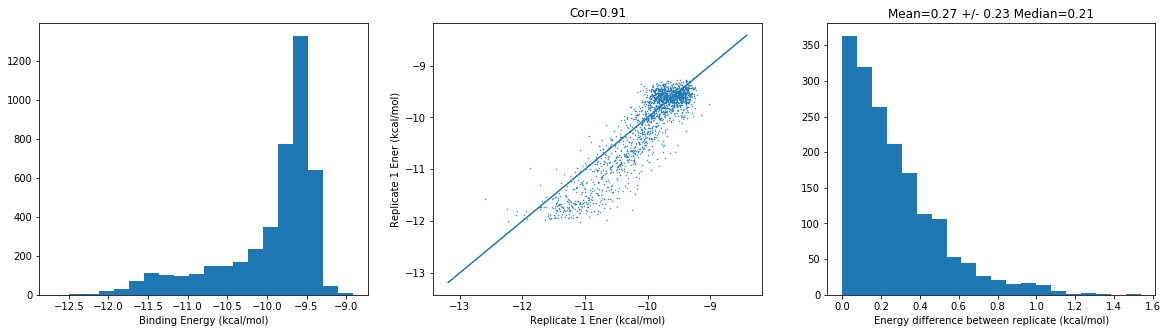

m1
A=3326 B=3480 Merged=4491 Over=2315


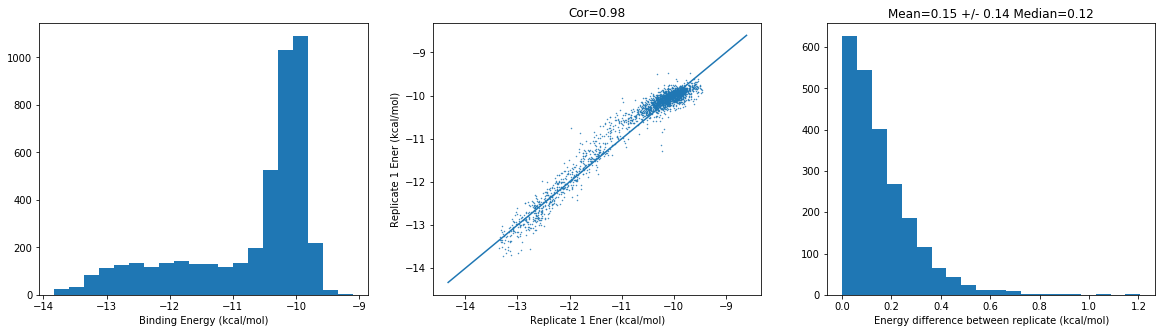

f100
A=1292 B=3489 Merged=3805 Over=976


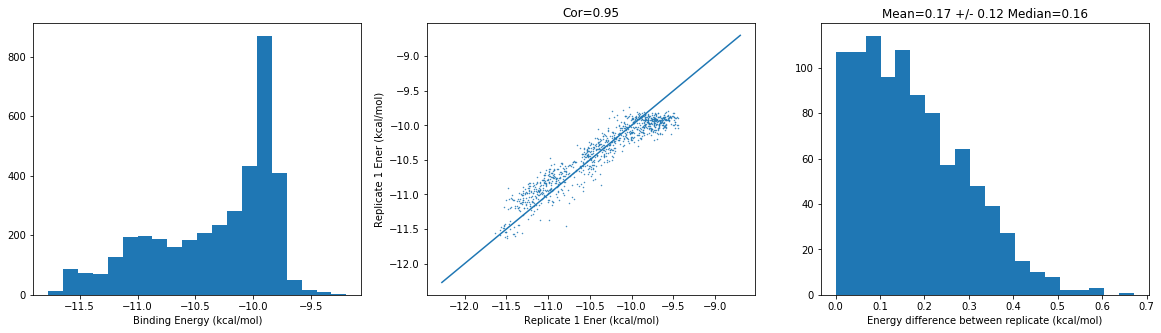

In [2]:
AllName = ["x1","m1","f100"] #This is the dataset I want to use

figsize(20,5)

#DF for concat data merge on seqience
for name in AllName:
    print(name)
    #Get 1st replicate
    MapDf = pd.read_csv("./"+name+".csv")
    
    #There is some duplicate (probably at DNA lebel)
    MapDf = MapDf.groupby(by="protein").mean()
    MapDf["protein"] = MapDf.index
    
    #Get 2nd replicate
    MapDfR = pd.read_csv("./"+name+"r.csv")
    
    #There is some duplicate (probably at DNA lebel)
    MapDfR = MapDfR.groupby(by="protein").mean()
    MapDfR["protein"] = MapDfR.index
    
    #Merge
    Merge = pd.merge(MapDf,MapDfR,on="protein",how="outer")
    #Print len
    print("A=%d B=%d Merged=%d Over=%d" % (len(MapDf),len(MapDfR),len(Merge),len(pd.merge(MapDf,MapDfR,on="protein"))))
    
    #Get mean energy
    Merge[name+"_mean_ener"] = Merge[[name+"_energy",name+"r_energy"]].mean(axis=1,skipna=True)
    
    #Write file
    Merge[["protein",name+"_mean_ener"]].to_csv("./"+name+"_merged.csv")
    
    #Get some graph
    plt.figure(1)
    
    #Energy distribution
    plt.subplot(131)
    plt.hist(Merge[name+"_mean_ener"],20)
    plt.xlabel("Binding Energy (kcal/mol)")
    #Plot replicate
    plt.subplot(132)
    subdf = Merge[[name+"_energy",name+"r_energy"]].dropna()
    plt.scatter(subdf[name+"_energy"],subdf[name+"r_energy"],s=0.2)
    plt.title("Cor=%.2f" % (np.corrcoef(subdf[name+"_energy"],subdf[name+"r_energy"])[0][1]))
    plt.plot([np.min(Merge[name+"_mean_ener"])-0.5,np.max(Merge[name+"_mean_ener"])+0.5],
            [np.min(Merge[name+"_mean_ener"])-0.5,np.max(Merge[name+"_mean_ener"])+0.5])
    plt.xlabel("Replicate 1 Ener (kcal/mol)")
    plt.ylabel("Replicate 1 Ener (kcal/mol)")
    #Get mean diff
    plt.subplot(133)
    diff = np.abs(Merge[name+"_energy"]-Merge[name+"r_energy"]).dropna()
    plt.xlabel("Energy difference between replicate (kcal/mol)")
    plt.hist(diff,20)
    plt.title("Mean=%.2f +/- %.2f Median=%.2f" % (np.mean(diff),np.std(diff),np.median(diff)))
    plt.show()


x1
4707 4690


/media/vince/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/media/vince/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


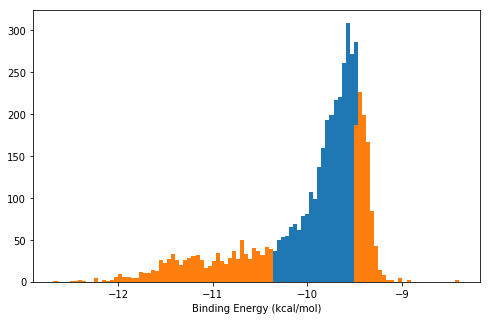

-9.49278396304 -10.3677937762 0.875009813209 4.37911575368


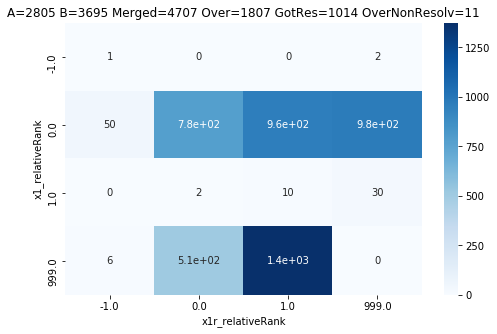

                                   x1_energy  x1r_energy  x1_mean_ener
x1_relativeRank x1r_relativeRank                                      
-1.0            -1.0              -12.595691  -11.564555    -12.080123
                 999.0            -12.568566  999.000000    -12.568566
 0.0            -1.0              -11.469426  -11.796895    -11.469426
                 0.0              -10.397491  -10.713354    -10.555423
                 1.0               -9.630548   -9.599107     -9.630548
                 999.0             -9.943171  999.000000     -9.943171
 1.0             0.0               -9.442024   -9.764667     -9.764667
                 1.0               -9.337766   -9.659151     -9.498459
                 999.0             -9.175681  999.000000     -9.175681
 999.0          -1.0              999.000000  -11.465761    -11.465761
                 0.0              999.000000  -10.459126    -10.459126
                 1.0              999.000000   -9.608238     -9.608238
1    2

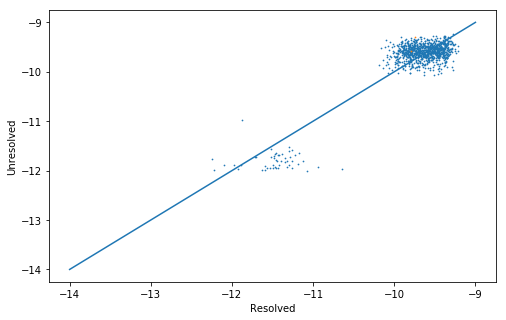

x1r_isOneHitWonder  False   999
x1_isOneHitWonder              
False                1807  1007
999                  1893     0
m1
4852 4754


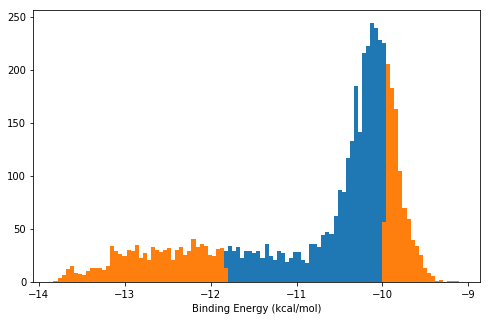

-9.96775908718 -11.8186705093 1.85091142208 22.7366786856


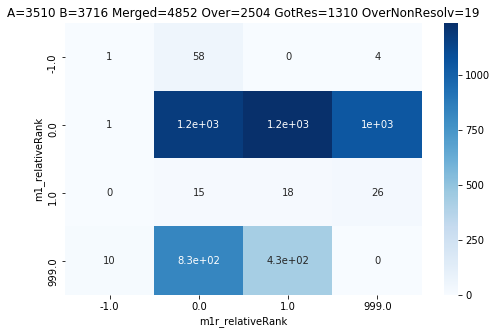

                                   m1_energy  m1r_energy  m1_mean_ener
m1_relativeRank m1r_relativeRank                                      
-1.0            -1.0              -13.263260  -13.928028    -13.595644
                 0.0              -13.176944  -13.267685    -13.267685
                 999.0            -13.118964  999.000000    -13.118964
 0.0            -1.0              -12.925673  -13.584232    -12.925673
                 0.0              -11.276112  -11.230380    -11.253246
                 1.0              -10.036194   -9.992848    -10.036194
                 999.0            -10.581730  999.000000    -10.581730
 1.0             0.0               -9.606409  -10.138783    -10.138783
                 1.0               -9.561557   -9.967709     -9.764633
                 999.0             -9.520932  999.000000     -9.520932
 999.0          -1.0              999.000000  -13.672338    -13.672338
                 0.0              999.000000  -11.602765    -11.602765
      

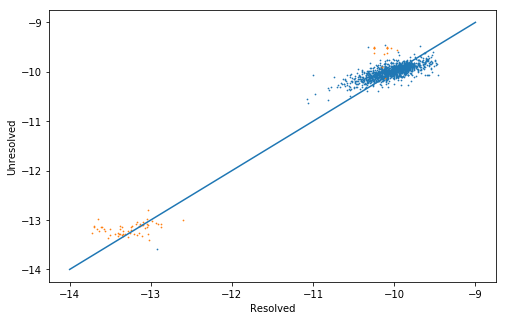

m1r_isOneHitWonder  False   999
m1_isOneHitWonder              
False                2504  1078
999                  1270     0
f100
4215 4158


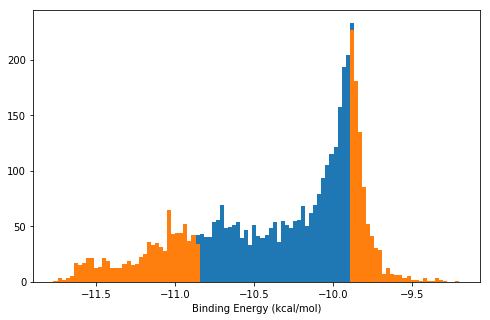

-9.89228335812 -10.851697237 0.959413878853 5.04957716725


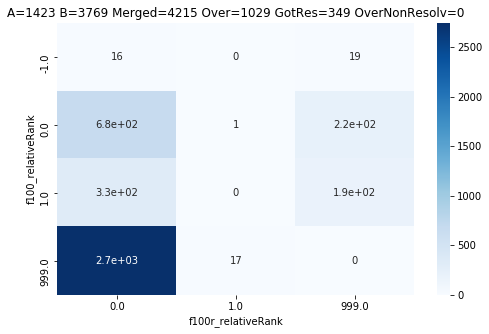

                                      f100_energy  f100r_energy  \
f100_relativeRank f100r_relativeRank                              
-1.0              0.0                  -11.396484    -11.493903   
                  999.0                -11.358581    999.000000   
 0.0              0.0                  -10.624095    -10.569620   
                  1.0                  -10.035976     -9.737846   
                  999.0                -10.954776    999.000000   
 1.0              0.0                   -9.825910    -10.027084   
                  999.0                 -9.818444    999.000000   
 999.0            0.0                  999.000000    -10.304950   
                  1.0                  999.000000     -9.538618   

                                      f100_mean_ener  
f100_relativeRank f100r_relativeRank                  
-1.0              0.0                     -11.493903  
                  999.0                   -11.358581  
 0.0              0.0                     

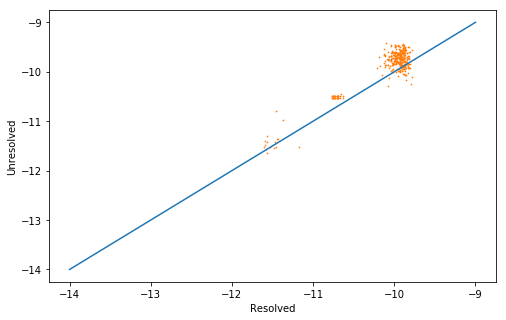

f100r_isOneHitWonder  False  999
f100_isOneHitWonder             
False                  1029  428
999                    2758    0


In [8]:

figsize(8,5)

ToKeep = 0.20



for name in AllName:
    print(name)
    #Get 1st replicate
    MapDf = pd.read_csv("./"+name+"_nonresolv.csv")
    #Get 2nd replicate
    MapDfR = pd.read_csv("./"+name+"r_nonresolv.csv")
    #Merge
    Merge = pd.merge(MapDf,MapDfR,on="protein",how="outer")
    print(len(Merge),len(np.unique(Merge["protein"])))
    #Print len
    
    EnerName = [name+"_energy",name+"r_energy"]
    Resolv = list(Merge.filter(regex="relativeRank").columns)
    #Get mean energy
    
    
    e1 = Merge[EnerName[0]].fillna(0)*(Merge[Resolv[0]] == 0)
    e2 = Merge[EnerName[1]].fillna(0)*(Merge[Resolv[1]] == 0)

    me = (e1+e2) / ((e1 != 0)*1.0 + (e2 != 0)*1.0)


    ue1 = Merge[EnerName[0]].fillna(0)*(Merge[Resolv[0]] != 0)
    ue2 = Merge[EnerName[1]].fillna(0)*(Merge[Resolv[1]] != 0)

    ume = (ue1+ue2) / ((ue1 != 0)*1.0 + (ue2 != 0)*1.0)

    MeanEner = (ume*(me.fillna(0) == 0)).fillna(0)+me.fillna(0)
    
    Merge[name+"_mean_ener"] = MeanEner
    
    #Sort
    Merge = Merge.sort_values(by=name+"_mean_ener")

    #Keep Top and bottom
    TotEntry = len(Merge)
    #Top binder
    Top = Merge.head(int(ToKeep*TotEntry))
    Top["binder"] = [True]*len(Top)
    
    Bot = Merge.tail(int(ToKeep*TotEntry))
    Bot["binder"] = [False]*len(Top)
    
    Extr = pd.concat([Top,Bot])
    
    plt.hist(Merge[name+"_mean_ener"],100)
    plt.hist(Extr[name+"_mean_ener"],100)
    plt.xlabel("Binding Energy (kcal/mol)")
    plt.show()
    
    #Get difference
    R = 1.9872036/1000.0
    T = 298.15
    diff_kcal = np.min(Bot[name+"_mean_ener"])-np.max(Top[name+"_mean_ener"])
    kd_ratio = np.power(2.71828,(diff_kcal/(R*T)))
    print(np.min(Bot[name+"_mean_ener"]),np.max(Top[name+"_mean_ener"]),diff_kcal,kd_ratio)
    
    #Write file
    Extr[["protein",name+"_mean_ener","binder"]].to_csv("./"+name+"_binary_merged.csv")
    
    subdf = Merge[Resolv+EnerName].dropna()
    cross = pd.crosstab(index=Merge[Resolv[0]].fillna(999),columns=Merge[Resolv[1]].fillna(999))
    offdia = np.sum(subdf[Resolv[0]] != subdf[Resolv[1]])
    
    BothUnresolved = np.sum((subdf[Resolv[0]] != 0) & (subdf[Resolv[1]] != 0))
    
    s = ("A=%d B=%d Merged=%d Over=%d GotRes=%d OverNonResolv=%d" % (len(MapDf),len(MapDfR),len(Merge),len(pd.merge(MapDf,MapDfR,on="protein")),offdia,BothUnresolved))
    sns.heatmap(cross,annot=True,cmap="Blues")
    plt.title(s)
    plt.show()
    print(Merge.fillna(999).groupby(by=Resolv).mean().filter(regex="ener"))
    #Find how many are unresolved
    print((Merge[Resolv] == 0).sum(axis=1).value_counts())
    rsub = subdf[(subdf[Resolv[0]] == 0) & (subdf[Resolv[1]] != 0)]
    plt.scatter(rsub[EnerName[0]],rsub[EnerName[1]],s=0.5)

    rsub = subdf[(subdf[Resolv[1]] == 0) & (subdf[Resolv[0]] != 0)]
    plt.scatter(rsub[EnerName[1]],rsub[EnerName[0]],s=0.5)
    plt.plot([-14,-9],[-14,-9])
    plt.xlabel("Resolved")
    plt.ylabel("Unresolved")
    plt.show()
    
    
    OneHit = list(Merge.filter(regex="Wonder").columns)


    cross = pd.crosstab(index=Merge[OneHit[0]].fillna(999),columns=Merge[OneHit[1]].fillna(999))
    print(cross)
    